# Análise de Risco Financeiro com Python e MongoDB

Este trabalho final da disciplina de Banco de Dados Não Relacional tem como objetivo realizar uma análise exploratória do dataset **`financial_risk_assessment`** (Kaggle), utilizando Python, Pandas e visualizações gráficas no Jupyter Notebook. Os dados serão armazenados e manipulados também com o uso do banco de dados NoSQL **MongoDB**, integrando análise de dados com tecnologias não relacionais.


In [755]:
import pandas as pd
import numpy as np
df = pd.read_csv('financial_risk_assessment.csv')

df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


### Selecionar apenas as colunas que serão usadas


In [756]:
df_financials_users = df[[
    'Credit Score',
    'Loan Amount',
    'Loan Purpose',
    'Payment History',
    'Risk Rating',
    'Age',
    'Gender',
    'Education Level',
    'Marital Status',
    'Number of Dependents',
    'Employment Status',
    'City',
    'State',
    'Country'
]].copy()

df_financials_users

,Credit Score,Loan Amount,Loan Purpose,Payment History,Risk Rating,Age,Gender,Education Level,Marital Status,Number of Dependents,Employment Status,City,State,Country
0,688.0,45713.0,Business,Poor,Low,49,Male,PhD,Divorced,0.0,Unemployed,Port Elizabeth,AS,Cyprus
1,690.0,33835.0,Auto,Fair,Medium,57,Female,Bachelor's,Widowed,0.0,Employed,North Catherine,OH,Turkmenistan
2,600.0,36623.0,Home,Fair,Medium,21,Non-binary,Master's,Single,3.0,Employed,South Scott,OK,Luxembourg
3,622.0,26541.0,Personal,Excellent,Medium,59,Male,Bachelor's,Single,3.0,Unemployed,Robinhaven,PR,Uganda
4,766.0,36528.0,Personal,Fair,Low,25,Non-binary,Bachelor's,Widowed,NaN,Unemployed,New Heather,IL,Namibia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,609.0,26187.0,Home,Fair,Low,23,Non-binary,Bachelor's,Widowed,4.0,Self-employed,Susanstad,TN,Djibouti
14996,700.0,35111.0,Auto,Fair,Medium,56,Male,PhD,Single,NaN,Self-employed,Port Heather,WA,Congo
14997,642.0,44369.0,Home,Excellent,High,29,Non-binary,PhD,Married,4.0,Unemployed,South Morganchester,LA,Palau
14998,638.0,32752.0,Home,Excellent,High,53,Non-binary,PhD,Divorced,NaN,Self-employed,Port Wayne,AK,Rwanda


###  Tratamento da coluna "Number of Dependents"

- **Number of Dependents**: 
Representa a quantidade de dependentes de cada pessoa, sendo uma variável discreta.
Como não faz sentido ter valores fracionários (ex: 2.5 dependentes), após converter para float para manipulação, preenchermos os valores ausentes com a média e arredondamos para o inteiro mais próximo, garantindo dados consistentes.


- **Credit Score:**  
  Representa a pontuação de crédito de cada cliente, que é um valor geralmente inteiro.  
  Após o preenchimento dos valores ausentes com a média, arredondamos e convertimos para o tipo inteiro (`int`), preservando a coerência dos dados.

- **Loan Amount:**  
  Representa o valor do empréstimo solicitado, que pode conter valores decimais (centavos).  
  Por isso, mantemos essa coluna no formato `float` para preservar a precisão dos valores monetários.


In [757]:
# Number of Dependents
df_financials_users['Number of Dependents'] = df_financials_users['Number of Dependents'].astype(float)
media_dependentes = df_financials_users['Number of Dependents'].mean()
df_financials_users['Number of Dependents'] = df_financials_users['Number of Dependents'].fillna(media_dependentes)
df_financials_users['Number of Dependents'] = df_financials_users['Number of Dependents'].round().astype(int)

# Credit Score
df_financials_users['Credit Score'] = df_financials_users['Credit Score'].astype(float)
df_financials_users['Credit Score'] = df_financials_users['Credit Score'].fillna(df_financials_users['Credit Score'].mean())
df_financials_users['Credit Score'] = df_financials_users['Credit Score'].round().astype(int)

#Loan Amount
df_financials_users['Loan Amount'] = df_financials_users['Loan Amount'].astype(float)
df_financials_users['Loan Amount'] = df_financials_users['Loan Amount'].fillna(df_financials_users['Loan Amount'].mean())
df_financials_users['Loan Amount'] = df_financials_users['Loan Amount'].round(2)



In [758]:
colunas_com_nan_ou_vazio = df_financials_users.columns[
    (df_financials_users.isna() | (df_financials_users == '')).any()
]
print("Colunas com NaN ou '':")
print(colunas_com_nan_ou_vazio.tolist())


Colunas com NaN ou '':
[]


### Tratamento das colunas "Credit Score" e "Loan Amount"

Para as colunas com valores ausentes (`NaN`), aplicamos a estratégia de preenchimento usando a média dos valores existentes, visando manter o máximo possível de dados para análise.




## Inserção dos Dados no MongoDB

Nesta etapa, realizamos a inserção dos dados tratados no banco de dados MongoDB local. Utilizamos a biblioteca `pymongo` para conectar e interagir com o banco, e o `pandas` para converter os DataFrames em dicionários compatíveis com o formato de documentos do MongoDB.

### Etapas realizadas:

1. **Conexão com o MongoDB local**:
   Conectamos ao servidor MongoDB que está rodando na máquina local, utilizando a URI padrão `mongodb://localhost:27017/`.
   
2. **Criação/seleção do banco de dados**:
   Utilizamos o banco de dados `financial_risk_assessment`. Caso ele ainda não exista, o MongoDB o cria automaticamente ao inserirmos dados.

In [759]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client["financial_risk_assessment"]

3. **Conversão dos DataFrames**:
Utilizamos `df_users.to_dict(orient="records")` e `df_financials.to_dict(orient="records")` para converter os DataFrames em listas de dicionários — o formato aceito pelo MongoDB para inserções em massa.

4. **Limpeza das coleções antes da inserção**:
Antes de inserir os novos dados, removemos todos os registros previamente existentes nas coleções `users` e `financials` utilizando o método `delete_many({})`.

In [760]:
financials_users_collection = db["financials_users"]
financials_users_collection.delete_many({})

df_financials_users = df_financials_users.reset_index(drop=True)
df_financials_users['id'] = df_financials_users.index + 1

users_data = df_financials_users.to_dict(orient="records")

result_users = financials_users_collection.insert_many(users_data)


In [761]:
collections = db.list_collection_names()

print("Collections existentes no banco de dados:")
for col in collections:
    print(f"- {col}")

Collections existentes no banco de dados:
- financials_users


In [762]:
from pprint import pprint

print("Registros da coleção 'financials_users':")
pprint(list(db.financials_users.find().limit(5)))


Registros da coleção 'financials_users':
[{'Age': 49,
  'City': 'Port Elizabeth',
  'Country': 'Cyprus',
  'Credit Score': 688,
  'Education Level': 'PhD',
  'Employment Status': 'Unemployed',
  'Gender': 'Male',
  'Loan Amount': 45713.0,
  'Loan Purpose': 'Business',
  'Marital Status': 'Divorced',
  'Number of Dependents': 0,
  'Payment History': 'Poor',
  'Risk Rating': 'Low',
  'State': 'AS',
  '_id': ObjectId('684f74b9364e270f0dfd6cf6'),
  'id': 1},
 {'Age': 57,
  'City': 'North Catherine',
  'Country': 'Turkmenistan',
  'Credit Score': 690,
  'Education Level': "Bachelor's",
  'Employment Status': 'Employed',
  'Gender': 'Female',
  'Loan Amount': 33835.0,
  'Loan Purpose': 'Auto',
  'Marital Status': 'Widowed',
  'Number of Dependents': 0,
  'Payment History': 'Fair',
  'Risk Rating': 'Medium',
  'State': 'OH',
  '_id': ObjectId('684f74b9364e270f0dfd6cf7'),
  'id': 2},
 {'Age': 21,
  'City': 'South Scott',
  'Country': 'Luxembourg',
  'Credit Score': 600,
  'Education Level': "M

### Inserção de documentos extras nas coleções

A inserção foi feita utilizando o método `insert_many()` da biblioteca `pymongo`.


In [763]:
from pymongo import DESCENDING

new_financial_users = [
    {
        "Credit Score": 688,
        "Loan Amount": 45713,
        "Loan Purpose": "Business",
        "Payment History": "Poor",
        "Risk Rating": "Low",
        "Age": 49,
        "Gender": "Male",
        "Education Level": "PhD",
        "Marital Status": "Divorced",
        "Number of Dependents": 0,
        "Employment Status": "Unemployed",
        "City": "Port Elizabeth",
        "State": "AS",
        "Country": "Cyprus"
    },
    {
        "Credit Score": 720,
        "Loan Amount": 30000,
        "Loan Purpose": "Education",
        "Payment History": "Good",
        "Risk Rating": "Medium",
        "Age": 34,
        "Gender": "Female",
        "Education Level": "Master's",
        "Marital Status": "Single",
        "Number of Dependents": 0,
        "Employment Status": "Employed",
        "City": "São Paulo",
        "State": "SP",
        "Country": "Brazil"
    },
    {
        "Credit Score": 650,
        "Loan Amount": 15000,
        "Loan Purpose": "Personal",
        "Payment History": "Fair",
        "Risk Rating": "Medium",
        "Age": 41,
        "Gender": "Male",
        "Education Level": "Bachelor's",
        "Marital Status": "Married",
        "Number of Dependents": 2,
        "Employment Status": "Self-employed",
        "City": "Austin",
        "State": "TX",
        "Country": "USA"
    },
    {
        "Credit Score": 590,
        "Loan Amount": 12000,
        "Loan Purpose": "Auto",
        "Payment History": "Poor",
        "Risk Rating": "High",
        "Age": 29,
        "Gender": "Female",
        "Education Level": "High School",
        "Marital Status": "Single",
        "Number of Dependents": 1,
        "Employment Status": "Unemployed",
        "City": "Glasgow",
        "State": "SC",
        "Country": "UK"
    },
    {
        "Credit Score": 710,
        "Loan Amount": 25000,
        "Loan Purpose": "Home",
        "Payment History": "Good",
        "Risk Rating": "Low",
        "Age": 36,
        "Gender": "Non-binary",
        "Education Level": "Bachelor's",
        "Marital Status": "Widowed",
        "Number of Dependents": 3,
        "Employment Status": "Employed",
        "City": "Melbourne",
        "State": "VIC",
        "Country": "Australia"
    }
]

last_doc = db.financials_users.find_one(sort=[("id", DESCENDING)])

start_id = last_doc['id'] + 1 if last_doc else 1

for i, record in enumerate(new_financial_users):
    record['id'] = start_id + i

db.financials_users.insert_many(new_financial_users)


InsertManyResult([ObjectId('684f74ba364e270f0dfda78e'), ObjectId('684f74ba364e270f0dfda78f'), ObjectId('684f74ba364e270f0dfda790'), ObjectId('684f74ba364e270f0dfda791'), ObjectId('684f74ba364e270f0dfda792')], acknowledged=True)

### Atualização de Registros Específicos na Collection `financials_users`

Para modificar documentos específicos na collection `financials_users` do MongoDB, utilizamos o método `update_one()` do PyMongo, que permite atualizar campos de um documento baseado em um filtro.

#### Objetivo

- Atualizar o documento com `id = 15004` para alterar:
  - **City** para `"Canterbury"`
  - **State** para `"EN"`
- Atualizar o documento com `id = 13901` para alterar:
  - **Number of Dependents** para `4`

In [764]:
db.financials_users.update_one(
    {"id": 15004},
    {"$set": {"City": "Canterbury", "State": "EN"}}
)

db.financials_users.update_one(
    {"id": 13901},
    {"$set": {"Number of Dependents": 4}}
)

updated_15004 = db.financials_users.find_one({"id": 15004})
updated_13901 = db.financials_users.find_one({"id": 13901})

pprint([updated_13901, updated_15004])


[{'Age': 60,
  'City': 'North Shawnshire',
  'Country': 'New Caledonia',
  'Credit Score': 777,
  'Education Level': "Master's",
  'Employment Status': 'Self-employed',
  'Gender': 'Male',
  'Loan Amount': 44027.0,
  'Loan Purpose': 'Business',
  'Marital Status': 'Married',
  'Number of Dependents': 4,
  'Payment History': 'Poor',
  'Risk Rating': 'Medium',
  'State': 'MI',
  '_id': ObjectId('684f74b9364e270f0dfda342'),
  'id': 13901},
 {'Age': 29,
  'City': 'Canterbury',
  'Country': 'UK',
  'Credit Score': 590,
  'Education Level': 'High School',
  'Employment Status': 'Unemployed',
  'Gender': 'Female',
  'Loan Amount': 12000,
  'Loan Purpose': 'Auto',
  'Marital Status': 'Single',
  'Number of Dependents': 1,
  'Payment History': 'Poor',
  'Risk Rating': 'High',
  'State': 'EN',
  '_id': ObjectId('684f74ba364e270f0dfda791'),
  'id': 15004}]


### Exclusão de documentos

Para excluir um documento com um `id` específico, utilizamos o método `.delete_one()` com um filtro correspondente ao campo `id`.

In [765]:
total = db.financials_users.count_documents({})
print(f"Total de documentos na coleção financials_users: {total}")

db.financials_users.delete_one({"id": 15004})
db.financials_users.delete_one({"id": 15005})

Total de documentos na coleção financials_users: 15005


DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

In [766]:
total = db.financials_users.count_documents({})
print(f"Total de documentos na coleção financials_users: {total}")

Total de documentos na coleção financials_users: 15003


### Exemplos de buscas utilizando diferentes operadores no MongoDB
Para atender ao requisito de realizar pelo menos duas buscas utilizando operadores distintos, foram implementadas as seguintes consultas:

1. Busca por documentos com Credit Score maior que 700
Nesta consulta utilizamos o operador $gt (greater than) para filtrar os documentos cujo campo Credit Score é superior a 700:

In [767]:
high_score_docs = list(db.financials_users.find({"Credit Score": {"$gt": 700}}))
print(f"Total com Credit Score > 700: {len(high_score_docs)}")

Total com Credit Score > 700: 6294


2. Agregação para identificar os 3 propósitos de empréstimo mais comuns
Aqui utilizamos o pipeline de agregação com os operadores:

- `$group`: agrupa os documentos por Loan Purpose e soma o total de registros por grupo;

- `$sort`: ordena os grupos pelo total de registros em ordem decrescente;

- `$limit`: limita a saída aos 3 primeiros resultados.

In [768]:
pipeline_top_purposes = [
    {"$group": {
        "_id": "$Loan Purpose",
        "total": {"$sum": 1}
    }},
    {"$sort": {"total": -1}},
    {"$limit": 3}
]

top_loan_purposes = list(db.financials_users.aggregate(pipeline_top_purposes))

print("Top 3 Loan Purposes:")
for doc in top_loan_purposes:
    print(f"{doc['_id']}: {doc['total']} registros")


Top 3 Loan Purposes:
Personal: 3772 registros
Home: 3766 registros
Business: 3739 registros


### Buscas utilizando diferentes funções de agregação no MongoDB
Para demonstrar o uso de múltiplas buscas com funções de agregação distintas, foram criados os seguintes exemplos:

1. Busca com filtro e cálculo da média de idade ($match + $group + $avg) para pessoas com Credit Score 600 e Risk Rating "High"
Neste pipeline, aplicamos as seguintes etapas:

- `$match`: filtra os documentos que possuem Credit Score igual a 600 e Risk Rating igual a "High", restringindo a análise a um grupo específico de risco elevado.

- `$group`: agrupa os documentos (neste caso, em um único grupo _id: None) e calcula a média da idade ($avg) dos usuários filtrados.

In [769]:
pipeline_media_idade = [
    {
        "$match": {
            "Credit Score": 600,
            "Risk Rating": "High"
        }
    },
    {
        "$group": {
            "_id": None,
            "media_idade": {"$avg": "$Age"}
        }
    }
]

resultado = list(db.financials_users.aggregate(pipeline_media_idade))

if resultado:
    print(f"Média de idade das pessoas com Credit Score 600 e Risk Rating 'High': {round(resultado[0]['media_idade'], 2)} anos")
else:
    print("Nenhum registro encontrado com Credit Score 600 e Risk Rating 'High'")


Média de idade das pessoas com Credit Score 600 e Risk Rating 'High': 42.0 anos


2. Busca com agrupamento e cálculo da média ($group + $avg) para encontrar os 5 países com maior valor médio de empréstimo
Neste pipeline, aplicamos as seguintes etapas:

- `$group`: agrupa os documentos por país ($Country) e calcula a média do campo Loan Amount.

- `$sort`: ordena os resultados pela média do empréstimo em ordem decrescente.

- `$limit`: limita o resultado aos 5 primeiros países.

In [770]:
pipeline_avg_loan_top5 = [
    {"$group": {
        "_id": "$Country",
        "media_emprestimo": {"$avg": "$Loan Amount"}
    }},
    {"$sort": {"media_emprestimo": -1}},  
    {"$limit": 5}
]

result_avg_loan_top5 = list(db.financials_users.aggregate(pipeline_avg_loan_top5))

for r in result_avg_loan_top5:
    print(f"{r['_id']}: média de empréstimo = {r['media_emprestimo']:.2f}")


Australia: média de empréstimo = 32140.59
Lithuania: média de empréstimo = 31288.05
Colombia: média de empréstimo = 31170.53
Bangladesh: média de empréstimo = 30775.07
Malaysia: média de empréstimo = 30711.91


In [771]:
from pymongo import ASCENDING

min_score_doc = db.financials_users.find_one(sort=[("Credit Score", ASCENDING)])
min_score = min_score_doc["Credit Score"]

pipeline = [
    {
        "$match": {
            "Risk Rating": "High"
        }
    },
    {
        "$group": {
            "_id": "$Marital Status",
            "total": {"$sum": 1}
        }
    },
    {
        "$sort": {"total": -1}
    },
    {
        "$limit": 1
    }
]

result = list(db.financials_users.aggregate(pipeline))

if result:
    print(f"O Marital Status mais comum entre pessoas com Risk Rating 'High' é: {result[0]['_id']} ({result[0]['total']} ocorrências)")
else:
    print("Nenhum resultado encontrado para os critérios.")


O Marital Status mais comum entre pessoas com Risk Rating 'High' é: Widowed (414 ocorrências)


3.Busca com agrupamento e contagem ($match + $group + $sum) para identificar o estado civil mais comum entre pessoas com Risk Rating "High"
Neste pipeline, aplicamos as seguintes etapas:

- `$match`: filtra os documentos onde o campo Risk Rating é igual a "High", selecionando apenas usuários considerados de alto risco.

- `$group`: agrupa os documentos por Marital Status (estado civil) e soma a quantidade de ocorrências de cada categoria com $sum.

- `$sort`: ordena os resultados em ordem decrescente com base no total de ocorrências.

- `$limit`: limita o resultado ao estado civil mais frequente.

In [772]:
min_score_doc = db.financials_users.find_one(sort=[("Credit Score", ASCENDING)])
min_score = min_score_doc["Credit Score"]

pipeline = [
    {
        "$match": {
            "Credit Score": min_score,
        }
    },
    {
        "$group": {
            "_id": "$Marital Status",
            "total": {"$sum": 1}
        }
    },
    {
        "$sort": {"total": -1}
    },
    {
        "$limit": 1
    }
]

result = list(db.financials_users.aggregate(pipeline))

if result:
    print(f"O Marital Status mais comum entre pessoas com Credit Score {min_score} é: {result[0]['_id']} ({result[0]['total']} ocorrências)")
else:
    print("Nenhum resultado encontrado para os critérios.")


O Marital Status mais comum entre pessoas com Credit Score 600 é: Single (16 ocorrências)


### Análise Exploratória

a. **Distribuição de Frequência do Campo Loan Purpose:**
A distribuição de frequência mostra quantas vezes cada valor aparece no campo "Loan Purpose", que indica o motivo do empréstimo solicitado pelo usuário. Essa análise ajuda a identificar os propósitos mais comuns entre os registros, permitindo insights sobre as principais motivações de empréstimos.

In [773]:
df = df_financials_users 
print("Distribuição de frequência do campo 'Loan Purpose':")
print(df["Loan Purpose"].value_counts())

Distribuição de frequência do campo 'Loan Purpose':
Loan Purpose
Personal    3771
Home        3766
Business    3738
Auto        3725
Name: count, dtype: int64


b. **Visão Geral dos Tipos de Dados e Métricas Estatísticas**:
Utilizamos a função dtypes para visualizar os tipos de dados de cada coluna. Isso é fundamental para entender como os dados estão estruturados (numéricos, categóricos, objetos, etc.).

In [774]:
print("Tipos de dados do DataFrame:")
print(df.dtypes)

Tipos de dados do DataFrame:
Credit Score              int64
Loan Amount             float64
Loan Purpose             object
Payment History          object
Risk Rating              object
Age                       int64
Gender                   object
Education Level          object
Marital Status           object
Number of Dependents      int64
Employment Status        object
City                     object
State                    object
Country                  object
id                        int64
dtype: object


### Montagem de 2 Gráficos e Apresentação dos Dados

1. Busca com agrupamento e soma ($group + $sum) para encontrar os 5 países com mais registros de histórico de pagamento "Poor"
Neste pipeline, aplicamos as seguintes etapas:

- `$match`: filtra os documentos cujo campo "Payment History" é "Poor".

- `$group`: agrupa os documentos por país ($Country) e soma o total de ocorrências.

- `$sort`: ordena os resultados pelo total em ordem decrescente.

- `$limit`: limita o resultado aos 5 primeiros países.

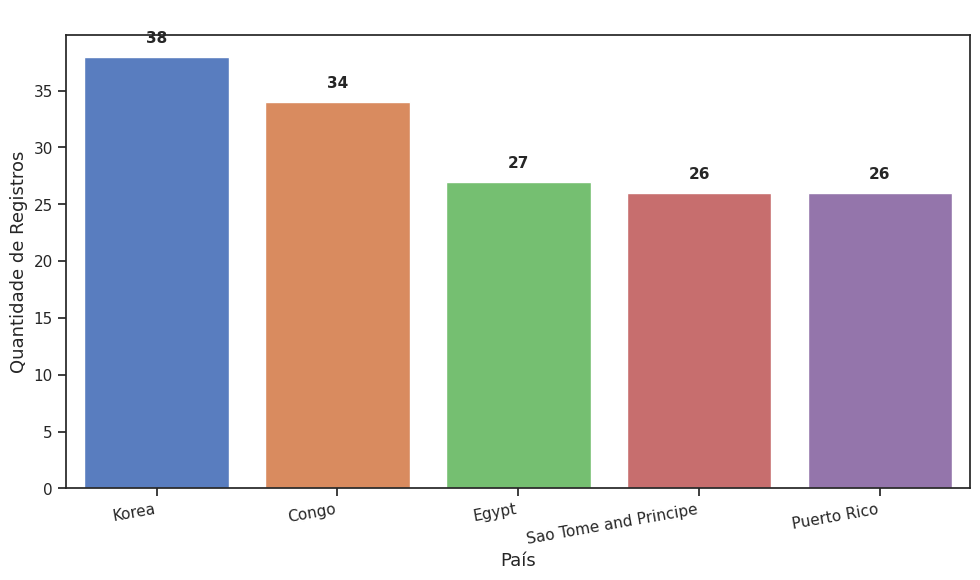

In [775]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pipeline = [
    {"$match": {"Payment History": "Poor"}},
    {"$group": {"_id": "$Country", "total": {"$sum": 1}}},
    {"$sort": {"total": -1}},
    {"$limit": 5}
]

meuresult = list(db.financials_users.aggregate(pipeline))
df_result = pd.DataFrame(meuresult)
df_result['_id'] = df_result['_id'].astype(str)

sns.set_theme(style="ticks", font_scale=1.1)

plt.figure(figsize=(10, 6))
palette = sns.color_palette("muted", n_colors=len(df_result))

barplot = sns.barplot(
    x="_id", y="total", data=df_result,
    hue="_id", palette=palette,

)


for bar in barplot.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    barplot.text(
    x=x,
    y=height + 1,
    s=str(int(height)),
    ha='center',
    va='bottom',
    fontsize=11,
    fontweight='bold',
    rotation=0  # garante que está "em pé"
)


plt.title("Top 5 Países com Mais Registros 'Poor'", fontsize=16, fontweight='bold', color='white')
plt.xlabel("País", fontsize=13)
plt.ylabel("Quantidade de Registros", fontsize=13)

plt.xticks(rotation=10, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


### Nesta análise exploratória, investigamos a presença de outliers e a distribuição dos valores do campo Loan Amount (valor do empréstimo) do nosso conjunto de dados.
a. Histograma com KDE (Curva de Densidade)
- Para entender melhor a distribuição dos valores do empréstimo, plotamos um histograma combinado com uma curva KDE. Isso mostra:

- A frequência com que os diferentes valores ocorrem (histograma)

- A estimativa da densidade de probabilidade contínua dos dados (KDE)

b. Boxplot para Visualização de Outliers
Por fim, usamos um boxplot para detectar visualmente possíveis outliers. O boxplot mostra:

- Mediana (linha dentro da caixa)

- Primeiro e terceiro quartis (borda inferior e superior da caixa)

- Outliers potenciais



Resumo Estatístico do Loan Amount:
count    15000.000000
mean     27450.010767
std      11939.184643
min       5000.000000
25%      18235.500000
50%      27450.010000
75%      36518.750000
max      49998.000000
Name: Loan Amount, dtype: float64


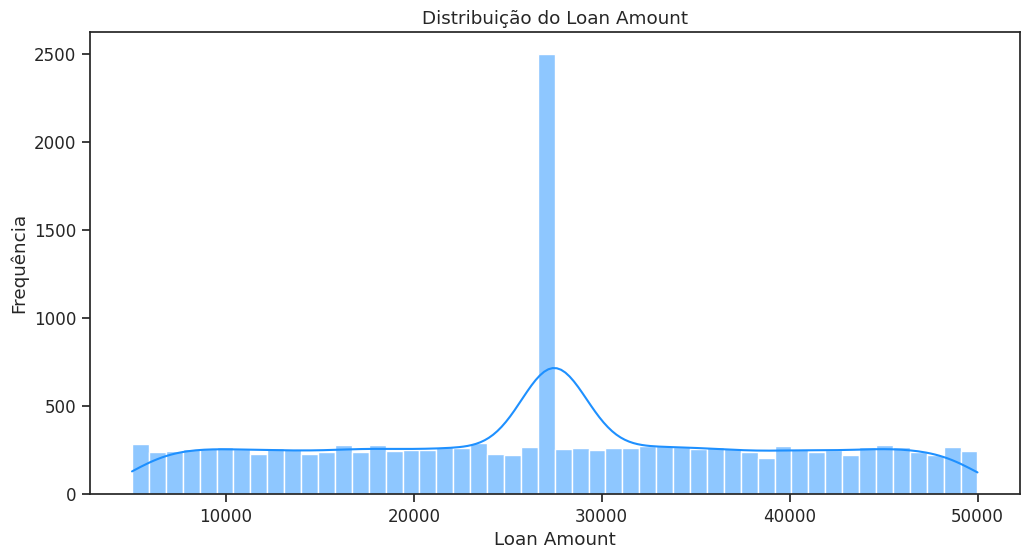

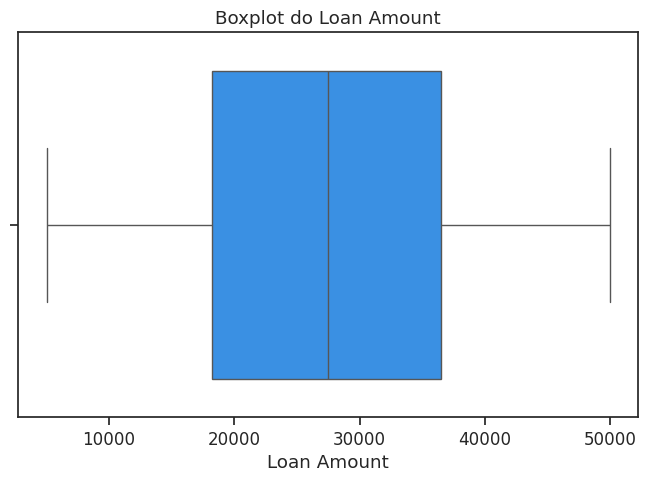

In [776]:
print("Resumo Estatístico do Loan Amount:")
print(df["Loan Amount"].describe())

# Histograma + KDE
plt.figure(figsize=(12,6))
sns.histplot(df["Loan Amount"], bins=50, kde=True, color='dodgerblue')
plt.title("Distribuição do Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequência")
plt.show()

# Boxplot p/ visualizar outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Loan Amount"], color='dodgerblue')
plt.title("Boxplot do Loan Amount")
plt.xlabel("Loan Amount")
plt.show()
